# Titanic 생존율 예측_EDA

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
ship = sns.load_dataset("titanic")

In [3]:
ship.to_csv('titanic.csv')

In [4]:
ship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
sh=ship
sh

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [6]:
sh.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
sh.shape

(891, 15)

In [8]:
sh.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [9]:
sh.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
sh.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [11]:
sh['fare'].nunique()  # 값 갯수

248

In [12]:
sh['pclass'].nunique  #()를 하면 갯수가 나오고 ()빠지면 이런식

<bound method IndexOpsMixin.nunique of 0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: pclass, Length: 891, dtype: int64>

In [13]:
sh['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [14]:
sh.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [15]:
sh['deck'].unique()  #데이터에 고유값들이 어떠한 종류들이 있는지 알고 싶을때 사용하는 함수

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['C', 'E', 'G', 'D', 'A', 'B', 'F']

In [16]:
sh['deck']

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: deck, Length: 891, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [17]:
sh['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [18]:
sh['parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [19]:
sh['parch'].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: parch, dtype: int64

## Cleaning and Filtering the data

In [20]:
#결측치 찾기
sh.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

age 177개, deck 688개, embark_town 2개로 확인

In [21]:
sh_clean = sh.drop(['deck'], axis = 1)
sh_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [22]:
sh_clean.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [23]:
#결측치 제거하기
sh_clean=sh_clean.dropna()
sh_clean

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [24]:
sh_clean.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

결측치 제거 완료!

In [25]:
sh_clean.shape

(712, 14)

In [27]:
sh.shape

(891, 15)

In [28]:
sh_clean['age'].value_counts()

24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
55.50     1
74.00     1
0.92      1
70.50     1
12.00     1
Name: age, Length: 88, dtype: int64

In [29]:
sh_clean['age'].nunique()

88

In [30]:
sh.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='sex', ylabel='age'>

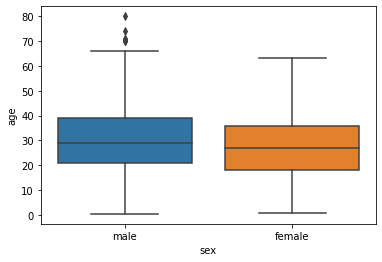

In [31]:
sns.boxplot(x = "sex", y ="age", data = sh_clean)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

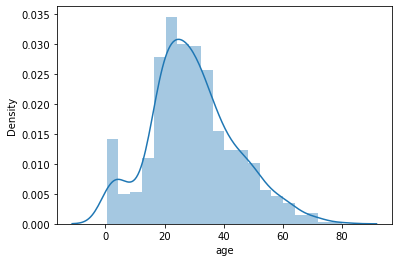

In [32]:
sns.distplot(sh_clean["age"])

In [33]:
#out liers 제거

sh_clean['age'].mean()

29.64209269662921

In [36]:
sh_clean = sh_clean[sh_clean['age']<69]
sh_clean

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [37]:
sh_clean.shape

(705, 14)

In [38]:
sh_clean['age'].mean()

29.21797163120567

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

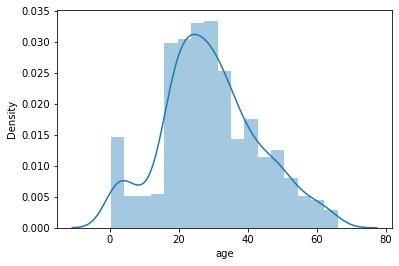

In [40]:
sns.distplot(sh_clean['age'])

<AxesSubplot:xlabel='sex', ylabel='age'>

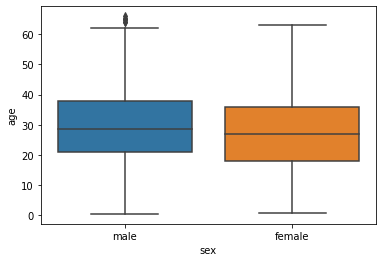

In [41]:
sns.boxplot(x='sex', y='age', data= sh_clean)

In [43]:
sh_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


<AxesSubplot:>

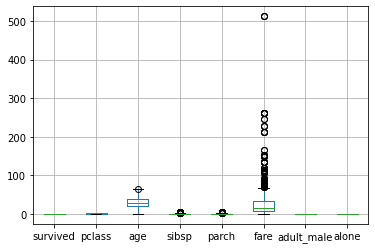

In [44]:
sh_clean.boxplot()

<AxesSubplot:>

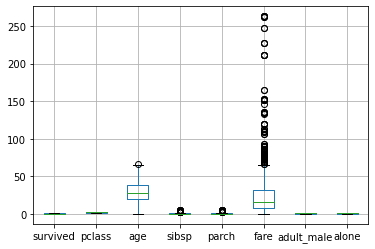

In [45]:
sh_clean = sh_clean[sh_clean['fare'] < 300]
sh_clean.boxplot()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare', ylabel='Density'>

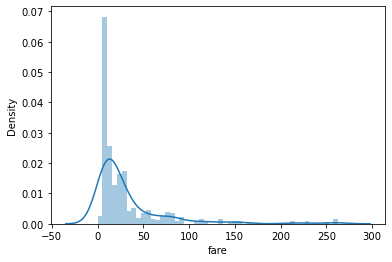

In [46]:
sns.distplot(sh_clean['fare'])

array([[<AxesSubplot:title={'center':'survived'}>,
        <AxesSubplot:title={'center':'pclass'}>],
       [<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sibsp'}>],
       [<AxesSubplot:title={'center':'parch'}>,
        <AxesSubplot:title={'center':'fare'}>]], dtype=object)

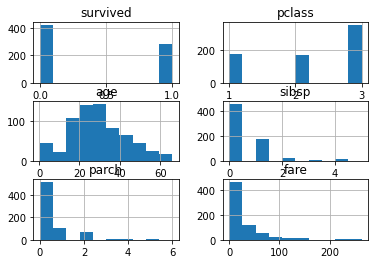

In [65]:
sh_clean.hist()

<AxesSubplot:>

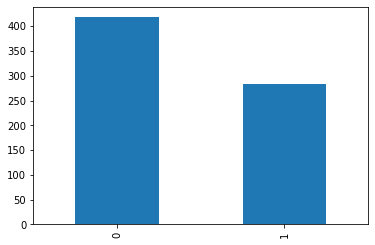

In [50]:
pd.value_counts(sh_clean['survived']).plot.bar()

In [51]:
sh_clean.groupby(["sex", "class"]).mean()

survived  pclass        age     sibsp     parch        fare  \
sex    class                                                                 
female First   0.963415     1.0  34.231707  0.560976  0.512195  103.696393   
       Second  0.918919     2.0  28.722973  0.500000  0.621622   21.951070   
       Third   0.460784     3.0  21.750000  0.823529  0.950980   15.875369   
male   First   0.389474     1.0  40.067579  0.389474  0.336842   62.901096   
       Second  0.153061     2.0  30.340102  0.377551  0.244898   21.221429   
       Third   0.151394     3.0  26.143108  0.494024  0.258964   12.197757   

               adult_male     alone  
sex    class                         
female First     0.000000  0.353659  
       Second    0.000000  0.405405  
       Third     0.000000  0.372549  
male   First     0.968421  0.526316  
       Second    0.908163  0.632653  
       Third     0.888446  0.737052

In [52]:
sh.groupby(["sex","class","who"]).mean()

survived  pclass        age     sibsp     parch  \
sex    class  who                                                      
female First  child  0.666667     1.0  10.333333  0.666667  1.666667   
              man         NaN     NaN        NaN       NaN       NaN   
              woman  0.978022     1.0  35.500000  0.549451  0.417582   
       Second child  1.000000     2.0   6.600000  0.700000  1.300000   
              man         NaN     NaN        NaN       NaN       NaN   
              woman  0.909091     2.0  32.179688  0.454545  0.500000   
       Third  child  0.533333     3.0   7.100000  1.533333  1.100000   
              man         NaN     NaN        NaN       NaN       NaN   
              woman  0.491228     3.0  27.854167  0.728070  0.719298   
male   First  child  1.000000     1.0   5.306667  0.666667  2.000000   
              man    0.352941     1.0  42.382653  0.302521  0.235294   
              woman       NaN     NaN        NaN       NaN       NaN   
       Second child  1.000000     2.0   2.258889  0.888889  1.222222   
              man    0.080808     2.0  33.588889  0.292929  0.131313   
              woman       NaN     NaN        NaN       NaN       NaN   
       Third  child  0.321429     3.0   6.515000  2.821429  1.321429   
              man    0.119122     3.0  28.995556  0.294671  0.128527   
              woman       NaN     NaN        NaN       NaN       NaN   

                           fare  adult_male     alone  
sex    class  who                                      
female First  child  160.962500         0.0  0.000000  
              man           NaN         NaN       NaN  
              woman  104.317995         0.0  0.373626  
       Second child   29.240000         0.0  0.000000  
              man           NaN         NaN       NaN  
              woman   20.868624         0.0  0.484848  
       Third  child   19.023753         0.0  0.166667  
              man           NaN         NaN       NaN  
              woman   15.354351         0.0  0.482456  
male   First  child  117.802767         0.0  0.000000  
              man     65.951086         1.0  0.630252  
              woman         NaN         NaN       NaN  
       Second child   27.306022         0.0  0.000000  
              man     19.054124         1.0  0.727273  
              woman         NaN         NaN       NaN  
       Third  child   27.716371         0.0  0.035714  
              man     11.340213         1.0  0.824451  
              woman         NaN         NaN       NaN

In [53]:
sh.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Relationship

In [54]:
sh_clean.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.356549,-0.074335,-0.014483,0.095426,0.273531,-0.554567,-0.201175
pclass,-0.356549,1.000000,-0.365121,0.061354,0.022519,-0.617591,0.102930,0.156030
age,-0.074335,-0.365121,1.000000,-0.308906,-0.186271,0.103100,0.275035,0.187284
sibsp,-0.014483,0.061354,-0.308906,1.000000,0.381803,0.197954,-0.311622,-0.629200
parch,0.095426,0.022519,-0.186271,0.381803,1.000000,0.259948,-0.366540,-0.574701
fare,0.273531,-0.617591,0.103100,0.197954,0.259948,1.000000,-0.228675,-0.333949
adult_male,-0.554567,0.102930,0.275035,-0.311622,-0.366540,-0.228675,1.000000,0.402214
alone,-0.201175,0.156030,0.187284,-0.629200,-0.574701,-0.333949,0.402214,1.000000


In [55]:
corr_sh_clean = sh_clean.corr()

<AxesSubplot:>

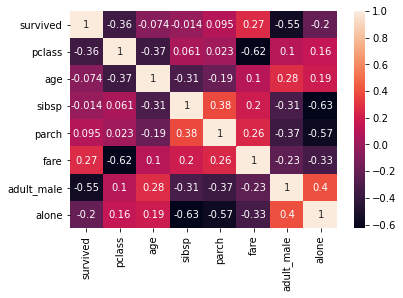

In [58]:
sns.heatmap(corr_sh_clean, annot=True)

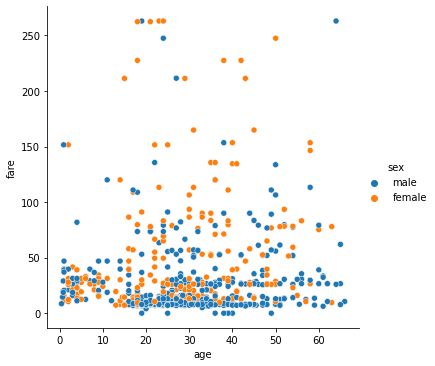

In [59]:
sns.relplot(x = "age", y="fare", hue="sex", data=sh_clean)

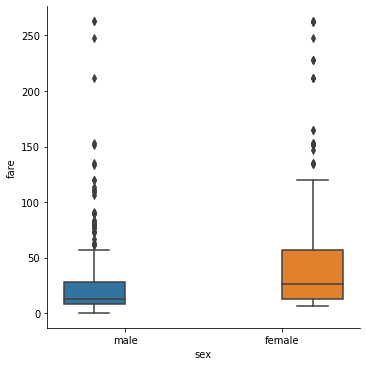

In [60]:
sns.catplot(x = "sex", y = "fare", hue="sex", data=sh_clean, kind="box")

- 지금까지 배운 Categorical plots를 모두 그릴 수 있음
- kind 파라미터로 설정 가능 --> strip(기본값), swarm, box, violin, boxen, point, bar, count
- relplot, displot과 마찬가지로 서브 플롯을 그릴 수 있음 (row, col 파라미터로 설정)

### 여러가지 EDA 진행해보기

histogram 모양을 다르게 나타내보기

(array([ 47.,  24., 108., 140., 144.,  84.,  65.,  47.,  25.,  18.]),
 array([ 0.42 ,  6.978, 13.536, 20.094, 26.652, 33.21 , 39.768, 46.326,
        52.884, 59.442, 66.   ]),
 [<matplotlib.patches.Polygon at 0x11d8f6b18b0>])

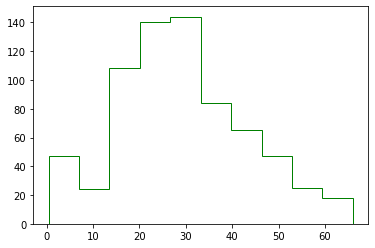

In [69]:
plt.hist(sh_clean['age'], color='green', histtype = 'step')

(array([463., 118.,  51.,  25.,  14.,  14.,   2.,   0.,   7.,   8.]),
 array([  0. ,  26.3,  52.6,  78.9, 105.2, 131.5, 157.8, 184.1, 210.4,
        236.7, 263. ]),
 [<matplotlib.patches.Polygon at 0x11d8fb56520>])

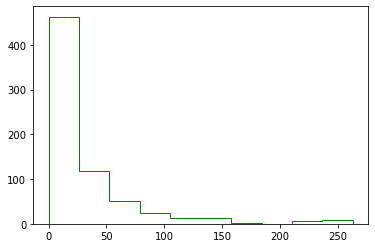

In [76]:
plt.hist(sh_clean['fare'], color ='green', histtype = 'step')

#### 히스토그램 겹치기, y축 빈도로 설정하기

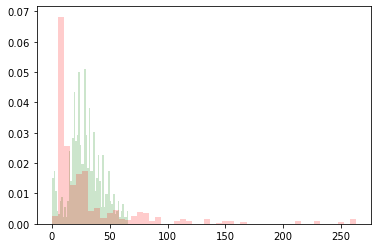

In [75]:
plt.hist(sh_clean['age'], color = 'green', alpha =0.2, bins = 50, label = sh_clean['age'], density = True)
plt.hist(sh_clean['fare'], color = 'red', alpha = 0.2, bins = 50, label = sh_clean['fare'], density = True)
#plt.lengend()
plt.show()

- density 변수를 True로 설정하면 각 구간의 개수가 y축에서 표현되는 것이 아니라, 각 구간의 빈도가 표시되는 것으로 변경

생존율 예측보다는 EDA를 나타내는 방식과 pandas 사용에 기반을 두고 데이터를 살펴보는 것으로 진행했다.